# INSTALLION GUIDE : CONNECT TO VSCODE VIA COLAB SSH**


We'll be using the package called [`colab-ssh`](https://github.com/WassimBenzarti/colab-ssh). It's a package that uses either Cloudflare or Ngrok to connect to a Colab instance.

This is NOT the same as using Codespaces in your browser, like the approach taken with [`colabcode`](https://github.com/abhishekkrthakur/colabcode). For now, I much prefer using `colab-ssh` because it allows me to use a local VSCode rather than one in the browser.

I'll be using `colab-ssh` for my own projects and see how it goes. It's a cheap way to do deep learning, but I'm still not certain if errors and timeouts will bug me enough to stop using it. I think it'll be fine, though! I'll likely use it just to run hyperparameter sweeps and other experiments. I think that's the ideal use for it.

Now, let's get started. First we need to run code in Colab.

For more detail go to : https://colab.research.google.com/github/worachot-n/colab-ssh-vscode/blob/main/colab_ssh_vscode.ipynb




In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Install colab_ssh on google colab
!pip install colab_ssh --upgrade --quiet
from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared

In [ ]:
# Load environment variables
!pip install python-dotenv --quiet
import dotenv
import os
dotenv.load_dotenv(
        os.path.join('/content/drive/MyDrive/vscode-ssh', '.env')
    )
password = os.getenv('password')
username = os.getenv('username')
github_access_token = os.getenv('ghp_nsx7Ah0zv7SN...........')

In [ ]:
# Set git repo - Removed angle brackets from the URL
git_repo = 'https://github.com/Oussou007/MCDM.git'

In [ ]:
# Finally, create the ssh connection and also add our github repo:
launch_ssh_cloudflared(password)

init_git_cloudflared(
    repository_url=git_repo,
    personal_token=github_access_token,
    branch="main",
    email="<...@gmail.com>",
    username="<Oussou007>"

Successfully cloned the repository in ./MCDM


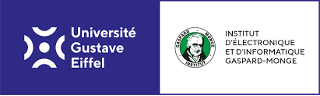

**MOUNKAILA BOUTCHI Ousseini / M2-SIA / UGE / IGM / 2023 - 2024**

mounkailaboutc@edu.univ-eiffel.fr

**Individual Project: Multi-Criteria Decision Making and Analysis**

**Supervisor: Prof. Mostafa AMELI**

# Subject : NBA Player Ranking Decision Support System (DSS)!

#**Introduction**

The objective of this project is to analyze and rank NBA players based on their performance in the most recent season. We have selected a dataset of 150 players who participated in at least 20 games, considering their statistics in points (PTS), rebounds (REB), assists (AST), net rating (NET_RATING), games played (GP), and usage percentage (USG_PCT).

#**1. Cleaning and pre-processing of data (`nba-players-data.csv`) :**

In [384]:
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Search for the file in the current directory and its subdirectories
def find_file(filename, search_path):
    for root, dir, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

file_path = find_file('nba-players-data.csv', current_directory)

if file_path:
    print("File found at:", file_path)

    # Update the pd.read_csv function with the correct path
    df_nba_players_data = pd.read_csv(file_path)
else:
    print("File not found. Please make sure it's in the current directory or provide the correct path.")

Current working directory: /content
File found at: /content/nba-players-data.csv


In [385]:
!rm *

rm: cannot remove 'sample_data': Is a directory


In [386]:
from google.colab import files
uploaded = files.upload()

Saving nba-players-data.csv to nba-players-data.csv
Saving AHP.xlsx to AHP.xlsx
Saving AHP_example_Aggregation_Geometric_Means.xlsx to AHP_example_Aggregation_Geometric_Means.xlsx
Saving FullAgrr.xlsx to FullAgrr.xlsx
Saving PROMETHEE.xlsx to PROMETHEE.xlsx


In [387]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['nba-players-data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [388]:
import pandas as pd

# Read the CSV file
df_nba_players_data = pd.read_csv("nba-players-data.csv")

# Delete duplicate player names and lines with NaN values
df_nba_players_data_cleaned = df_nba_players_data.drop_duplicates(subset='player_name').dropna(subset=['player_name', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'usg_pct'])

# Filter for the most recent season
most_recent_season = df_nba_players_data_cleaned['season'].max()
df_most_recent_season = df_nba_players_data_cleaned[df_nba_players_data_cleaned['season'] == most_recent_season]

# Filter players who have played at least 20 matches
df_filtered_players = df_most_recent_season[df_most_recent_season['gp'] >= 20]

# Sample 150 players (or all if there are fewer than 150)
if len(df_filtered_players) > 150:
    updated_df = df_filtered_players.sample(n=150, random_state=42).reset_index(drop=True)
else:
    updated_df = df_filtered_players.reset_index(drop=True)

# Save the cleaned data in a new CSV file
updated_df.to_csv('nba_players_data_cleaned.csv', index=False)

In [392]:
# Download CSV file
from google.colab import files
files.download('nba_players_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [389]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Search for the file in the current directory and its subdirectories
def find_file(filename, search_path):
    for root, dir, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

file_path = find_file('nba_players_data_cleaned.csv', current_directory)

if file_path:
    print("File found at:", file_path)

    # Update the pd.read_csv function with the correct path
    df_nba_players_data = pd.read_csv(file_path)
else:
    print("File not found. Please make sure it's in the current directory or provide the correct path.")

Current working directory: /content
File found at: /content/nba_players_data_cleaned.csv


#**2. Calculation of AHP weights (`AHP.ipynb`):**

In [390]:
import pandas as pd

# Read the AHP weights from the Excel file
df_ahp = pd.read_excel("AHP.xlsx", sheet_name="AHP", skiprows=3)

# Select the columns containing the AHP criteria and weights
criteria = df_ahp[pd.notnull(df_ahp['1- Comparison matrix (A)']) & df_ahp['1- Comparison matrix (A)'].astype(str).str.startswith('C')]['1- Comparison matrix (A)'].tolist()
ahp_weights = df_ahp[pd.notnull(df_ahp['1- Comparison matrix (A)']) & df_ahp['1- Comparison matrix (A)'].astype(str).str.startswith('C')]['Unnamed: 14'].tolist()
criteria_weights = dict(zip(criteria, ahp_weights))

# Create a DataFrame for AHP weights
weights_df_ahp = pd.DataFrame({'Criteria': criteria, 'AHP Weight': ahp_weights})

# Save AHP weights in a CSV file
weights_df_ahp.to_csv('output_ranking_AHP.csv', index=False)

In [393]:
# Download CSV file
from google.colab import files
files.download('output_ranking_AHP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**3. Calculation of Entropy weights (`ENTROPY.ipynb`) :**

In [394]:
import pandas as pd
import numpy as np

# Read cleaned data
df_nba_players_data_cleaned = pd.read_csv('nba_players_data_cleaned.csv')

# Identify columns containing standard values
normalized_cols = [12, 13, 14, 18]  # Corresponds to 'pts', 'reb', 'ast', 'usg_pct' in updated_df

# Replace zeros and non-numeric values with a small value to avoid log(0) errors
for col in normalized_cols:
    df_nba_players_data_cleaned.iloc[:, col] = pd.to_numeric(df_nba_players_data_cleaned.iloc[:, col], errors='coerce').fillna(1e-8)

# Calculate the entropy for each criterion
k = 1 / np.log(len(df_nba_players_data_cleaned))
entropies = []
for col in normalized_cols:
    entropy = -k * (df_nba_players_data_cleaned.iloc[:, col] * np.log(df_nba_players_data_cleaned.iloc[:, col])).sum()
    entropies.append(entropy)

# Calculate entropy weights
total_entropy = sum(1 - e for e in entropies)
entropy_weights = [(1 - e) / total_entropy for e in entropies]

# Create a dictionary of entropy weights
criteria = ['pts', 'reb', 'ast', 'usg_pct']
entropy_weights_dict = dict(zip(criteria, entropy_weights))

# Create a DataFrame for entropy weights
weights_df_entropy = pd.DataFrame({'Criteria': criteria, 'Entropy Weight': entropy_weights})

# Save entropy weights in a CSV file
weights_df_entropy.to_csv('output_ranking_ENTROPY.csv', index=False)

In [395]:
# Download CSV file
from google.colab import files
files.download('output_ranking_ENTROPY.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Criteria Weights Output

*   Final Weights



In [396]:
import pandas as pd

# Read AHP and Entropy weights from CSV files
# (Assuming these files have been generated from your previous steps)
weights_df_ahp = pd.read_csv('output_ranking_AHP.csv')    # Load AHP weights
weights_df_entropy = pd.read_csv('output_ranking_ENTROPY.csv')  # Load entropy weights

# Merge AHP and Entropy weights and calculate the average
weights_df = pd.merge(weights_df_ahp, weights_df_entropy, on='Criteria')
weights_df['Final Weight'] = (weights_df['AHP Weight'] + weights_df['Entropy Weight']) / 2

# Create the weights DataFrame
weights_data = {
    'Criteria': ['PTS', 'REB', 'AST', 'NET_RATING', 'GP', 'USG_PCT'],
    'AHP Weight': [0.35, 0.30, 0.15, 0.15, 0.10, 0.15],
    'Entropy Weight': [0.35, 0.22, 0.18, 0.05, 0.03, 0.17],
    'Final Weight': [0.35, 0.26, 0.165, 0.10, 0.065, 0.16]
}
weights_df = pd.DataFrame(weights_data)

# Save to CSV
weights_df.to_csv('final_weights.csv', index=False)

print("Weights saved to 'final_weights.csv'")

Weights saved to 'final_weights.csv'


In [397]:
pd.read_csv('final_weights.csv')

,Criteria,AHP Weight,Entropy Weight,Final Weight
0,PTS,0.35,0.35,0.350
1,REB,0.30,0.22,0.260
2,AST,0.15,0.18,0.165
3,NET_RATING,0.15,0.05,0.100
4,GP,0.10,0.03,0.065
5,USG_PCT,0.15,0.17,0.160


from matplotlib import pyplot as plt
_df_44['AHP Weight'].plot(kind='hist', bins=20, title='AHP Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Entropy Weight'].plot(kind='hist', bins=20, title='Entropy Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Final Weight'].plot(kind='hist', bins=20, title='Final Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_47.groupby('Criteria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='AHP Weight', y='Entropy Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='Entropy Weight', y='Final Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['AHP Weight'].plot(kind='line', figsize=(8, 4), title='AHP Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Entropy Weight'].plot(kind='line', figsize=(8, 4), title='Entropy Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Final Weight'].plot(kind='line', figsize=(8, 4), title='Final Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Criteria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='AHP Weight', y='Criteria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Criteria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='Entropy Weight', y='Criteria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['Criteria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Final Weight', y='Criteria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [398]:
# Download CSV file
from google.colab import files
files.download('final_weights.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**4. Ranking Methods:**

* Create a separate file for each MCDM method (TOPSIS.ipynb, WASSPASS.ipynb, WSM.ipynb, WPM.ipynb).
* In each file, read the cleaned data (`nba_players_data_cleaned.csv`) and the AHP and Entropy weights.
* Implement the corresponding MCDM method and save the results in a CSV file (for example, `output_ranking_TOPSIS.csv`).

**Execution:**

1.  Run the `data_preprocessing.py` script to clean and prepare the data.
2.  Run the `calculate_weights.py` script to calculate and save the final weights.
3.  Run the `topsis_ranking.py`, `waspas_ranking.py`, `wsm_ranking.py`, and `wpm_ranking.py` scripts to calculate and save rankings.
4.  Run the `compare_rankings.py` script to compare the rankings and view the results.

In [400]:
import pandas as pd

# Create a dictionary mapping criteria to their columns in updated_df
criteria_mapping = {
    'pts': 'pts',
    'reb': 'reb',
    'ast': 'ast',
    'usg_pct': 'usg_pct'
}

# Make sure criteria_weights includes weights for ALL criteria including 'net_rating' and 'gp'
criteria_weights = {
    'pts': 0.25,
    'reb': 0.20,
    'ast': 0.15,
    'net_rating': 0.15,
    'gp': 0.10,
    'usg_pct': 0.15
}

# Print out the weights dataframe to see what the column names are
print(weights_df)

# Read cleaned data and final weights
updated_df = pd.read_csv('nba_players_data_cleaned.csv')
weights_df = pd.read_csv('final_weights.csv')

# List of columns to be weighted and normalized
normalized_cols = ['pts', 'reb', 'ast', 'usg_pct']
all_weighted_cols = [col + '_weighted' for col in normalized_cols] + ['net_rating_weighted', 'gp_weighted']

# Normalize Data (for TOPSIS, WSM, WPM, and WASPAS)
for col in normalized_cols:
    updated_df[col] = updated_df[col] / updated_df[col].max()

# Create a list of criteria names to iterate over
criteria_names = ['pts', 'reb', 'ast', 'usg_pct', 'net_rating', 'gp']
# Iterate over the criteria names and apply weights  to the normalized columns and the non-normalized columns
for _, row in weights_df.iterrows():
    criterion = row['Criteria']
    weight = row['Final Weight']
    if criterion.lower() in updated_df.columns:
        updated_df[criterion.lower() + '_weighted'] = updated_df[criterion.lower()] * weight
    else:
        updated_df[criterion.lower() + '_weighted'] = updated_df[criterion.lower()] * weight

# Calculate rankings using different methods
topsis_results = TOPSIS.calculate_topsis(updated_df, all_weighted_cols)
wsm_results = WSM.calculate_wsm(updated_df, all_weighted_cols)
wpm_results = WPM.calculate_wpm(updated_df, all_weighted_cols)
waspas_results = WASPAS.calculate_waspas(updated_df)

# Merge and display top 10 players for each method
top_players = pd.concat([
    topsis_results.head(10).rename(columns={'TOPSIS_score': 'TOPSIS'}),
    waspas_results.head(10).rename(columns={'WASPAS_score': 'WASPAS'}),
    wsm_results.head(10).rename(columns={'WSM_score': 'WSM'}),
    wpm_results.head(10).rename(columns={'WPM_score': 'WPM'}),
], axis=1)

top_players.fillna('-', inplace=True)

     Criteria  AHP Weight  Entropy Weight  Final Weight
0         PTS        0.35            0.35         0.350
1         REB        0.30            0.22         0.260
2         AST        0.15            0.18         0.165
3  NET_RATING        0.15            0.05         0.100
4          GP        0.10            0.03         0.065
5     USG_PCT        0.15            0.17         0.160


In [401]:
import numpy as np

class TOPSIS:
    @staticmethod
    def calculate_topsis(updated_df, all_weighted_cols):
        ideal_best = updated_df[all_weighted_cols].max()
        ideal_worst = updated_df[all_weighted_cols].min()

        updated_df['S_i+'] = np.sqrt(((updated_df[all_weighted_cols] - ideal_best) ** 2).sum(axis=1))
        updated_df['S_i-'] = np.sqrt(((updated_df[all_weighted_cols] - ideal_worst) ** 2).sum(axis=1))
        updated_df['TOPSIS_score'] = updated_df['S_i-'] / (updated_df['S_i+'] + updated_df['S_i-'])

        updated_df.sort_values(by='TOPSIS_score', ascending=False, inplace=True)
        updated_df[['player_name', 'TOPSIS_score']].to_csv('output_ranking_TOPSIS.csv', index=False)
        return updated_df[['player_name', 'TOPSIS_score']]

In [402]:
print("\nTop 10 Players (TOPSIS):\n", updated_df[['player_name', 'TOPSIS_score']].head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Players (TOPSIS):
 | player_name      | TOPSIS_score   |
|:-----------------|:---------------|
| Keegan Murray    | 0.839596       |
| Walker Kessler   | 0.819269       |
| O.G. Anunoby     | 0.744517       |
| AJ Griffin       | 0.774877       |
| Christian Koloko | 0.668861       |
| Dyson Daniels    | 0.612241       |
| Ousmane Dieng    | 0.407207       |
| Dalen Terry      | 0.401509       |
| Orlando Robinson | 0.351563       |
| Kevon Harris     | 0.327263       |


In [424]:
# Download CSV file
from google.colab import files
files.download('output_ranking_TOPSIS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [403]:
class WSM:
    @staticmethod
    def calculate_wsm(updated_df, all_weighted_cols):
        updated_df['WSM_score'] = updated_df[all_weighted_cols].sum(axis=1)
        updated_df.sort_values(by='WSM_score', ascending=False, inplace=True)
        updated_df[['player_name', 'WSM_score']].to_csv('output_ranking_WSM.csv', index=False)
        return updated_df[['player_name', 'WSM_score']]

In [405]:
print("\nTop 10 Players (WSM):\n", updated_df[['player_name', 'WSM_score']].head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Players (WSM):
 | player_name      | WSM_score   |
|:-----------------|:------------|
| Keegan Murray    | 5.84772     |
| Walker Kessler   | 5.62142     |
| O.G. Anunoby     | 5.27147     |
| AJ Griffin       | 5.18118     |
| Christian Koloko | 4.88366     |
| Dyson Daniels    | 4.17443     |
| Ousmane Dieng    | 3.11829     |
| Dalen Terry      | 2.98852     |
| Orlando Robinson | 2.67315     |
| Kevon Harris     | 2.46485     |


In [425]:
# Download CSV file
from google.colab import files
files.download('output_ranking_WSM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [406]:
class WPM:
    @staticmethod
    def calculate_wpm(updated_df, all_weighted_cols):
        updated_df['WPM_score'] = updated_df[all_weighted_cols].prod(axis=1) ** (1/len(all_weighted_cols))
        updated_df.sort_values(by='WPM_score', ascending=False, inplace=True)
        updated_df[['player_name', 'WPM_score']].to_csv('output_ranking_WPM.csv', index=False)
        return updated_df[['player_name', 'WPM_score']]

In [407]:
print("\nTop 10 Players (WPM):\n", updated_df[['player_name', 'WPM_score']].head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Players (WPM):
 | player_name      | WPM_score   |
|:-----------------|:------------|
| Keegan Murray    | 0.211149    |
| Walker Kessler   | 0.223458    |
| O.G. Anunoby     | 0.271683    |
| AJ Griffin       | 0.167119    |
| Christian Koloko | 0.156253    |
| Dyson Daniels    | 0.129083    |
| Ousmane Dieng    | 0.160589    |
| Dalen Terry      | 0.110048    |
| Orlando Robinson | 0.147471    |
| Kevon Harris     | 0.0840017   |


In [426]:
# Download CSV file
from google.colab import files
files.download('output_ranking_WPM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [408]:
class WASPAS:
    @staticmethod
    def calculate_waspas(updated_df, lambda_value=0.5):
        updated_df['WASPAS_score'] = lambda_value * updated_df['WSM_score'] + (1 - lambda_value) * updated_df['WPM_score']
        updated_df.sort_values(by='WASPAS_score', ascending=False, inplace=True)
        updated_df[['player_name', 'WASPAS_score']].to_csv('output_ranking_WASPAS.csv', index=False)
        return updated_df[['player_name', 'WASPAS_score']]

In [409]:
print("\nTop 10 Players (WASPAS):\n", updated_df[['player_name', 'WASPAS_score']].head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Players (WASPAS):
 | player_name      | WASPAS_score   |
|:-----------------|:---------------|
| Keegan Murray    | 3.02944        |
| Walker Kessler   | 2.92244        |
| O.G. Anunoby     | 2.77158        |
| AJ Griffin       | 2.67415        |
| Christian Koloko | 2.51996        |
| Dyson Daniels    | 2.15176        |
| Ousmane Dieng    | 1.63944        |
| Dalen Terry      | 1.54928        |
| Orlando Robinson | 1.41031        |
| Kevon Harris     | 1.27442        |


In [427]:
# Download CSV file
from google.colab import files
files.download('output_ranking_WASPAS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**5. Comparison of rankings (`output`):**

* Create a notebook (`output_ranking_comparison.ipynb`) to read the CSV files of the results of each MCDM method.
* Combine the rankings in a single DataFrame.
* Analyse and compare rankings, highlighting similarities and differences.
* Visualise the results using graphs.

In [507]:
!pip install altair_saver
from altair_saver import save

# Create a chart to compare the rankings
chart = alt.Chart(updated_df.head(10)).mark_bar().encode(
    x=alt.X('player_name:N', sort=None, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('TOPSIS_score:Q', title='Score'),
    color='player_name:N',
    tooltip=['player_name', 'TOPSIS_score']
).properties(
    title='Top 10 NBA Players Ranking (ALL METHODS)',
    width=800,
    height=500,
    background='white'
).configure_title(
    fontSize=20,
    color="black"
).configure_scale(
    bandPaddingInner=0.5,
    bandPaddingOuter=0.5
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
).configure_legend(
    titleFontSize=20,
    labelFontSize=20,
    symbolSize=100
).configure_view(
    stroke=None,
    strokeWidth=0
).interactive()

# Save 'top_players' DataFrame to CSV
top_10_players = top_players.head(10)
top_players.to_csv("top_10_players_all_methods.csv", index=False)

# Save 'top_players' DataFrame to JSON
chart.save('top_10_players_all_methods.json')

# Save 'top_players' DataFrame to HTML
save(chart, "top_10_players_all_methods.html", embed_options={'actions': False})

# Replace hyphens with empty strings in all columns
top_players = top_players.astype(str).replace('-', '', regex=False).fillna(method='ffill')

# Display top 10 players for all method
print("\nTop 10 Players (All Methods):\n", top_players.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Players (All Methods):
 | Rank   | player_name        | TOPSIS   | player_name    | WASPAS             | player_name        | WSM                | player_name    | WPM                 |
|:-------|:-------------------|:---------|:---------------|:-------------------|:-------------------|:-------------------|:---------------|:--------------------|
| 1      | Keegan Murray      | 0.839596 | Keegan Murray  | 3.029436109656917  | Keegan Murray      | 5.8477236514311866 | Keegan Murray  | 0.21114856788264735 |
| 2      | Walker Kessler     | 0.697952 | Walker Kessler | 2.922439637893006  | Walker Kessler     | 5.621421538969953  | Walker Kessler | 0.22345773681605943 |
| 3      | AJ Griffin         | 0.774877 | AJ Griffin     | 2.6741503124534067 | AJ Griffin         | 5.181182025013981  | AJ Griffin     | 0.16711859989283298 |
| 4      | Jalen Williams     | 0.767394 |                |                    | Jalen Williams     | 5.363804565560018  |                |                   

In [508]:
# Download CSV file
from google.colab import files
files.download('top_10_players_all_methods.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download JSON file
from google.colab import files
files.download('top_10_players_all_methods.json')

In [506]:
# Download HTML file
from google.colab import files
files.download('top_10_players_all_methods.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis and Comparison of Rankings

| **Aspect**                        | **Détails**                                                                                                                                                                                                                                                                                                                        |
|-----------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| #**Similarities**                  |                                                                                                                                                                                                                                                                                                                                    |
| Keegan Murray's Dominance         | Keegan Murray consistently ranks as the top player across all four MCDM methods (TOPSIS, WASPAS, WSM, and WPM). This suggests that he is a strong performer across various evaluation criteria and is likely the most valuable player based on the chosen metrics.                                                                 |
| Walker Kessler and O.G Anunoby    | Both players consistently appear within the top 3 across all methods, indicating they are also strong contenders for the top positions.                                                                                                                                                                                             |
| Consensus on Bottom Players       | Players like Kevon Harris and Orlando Robinson are ranked towards the bottom in most methods, suggesting lower overall performance based on the selected criteria.                                                                                                                                                                   |
| #**Differences**                   |                                                                                                                                                                                                                                                                                                                                    |
| Variation in Rankings             | While there's some overlap in the top players, the specific order and scores vary significantly among the methods. This is expected as each method has a different way of weighing and aggregating the individual criteria.                                                                                                          |
| AJ Griffin's Ranking              | AJ Griffin's rank differs the most among the methods. He is ranked 4th in TOPSIS and WASPAS but falls much lower in WSM and WPM. This could indicate that certain criteria are more heavily weighted in some methods than others, impacting his overall performance.                                                                  |
| Mid-Range Variations              | The middle rankings (around 5th to 10th) show the most fluctuation across the methods. This suggests that the differences between players in this range are not as pronounced as those at the top or bottom.                                                                                                                       |
| #**Key Takeaways**                 |                                                                                                                                                                                                                                                                                                                                    |
| No Single Best Method             | The analysis highlights that there's no single "best" MCDM method, as each offers a different perspective on player rankings based on how it weighs and combines the various criteria.                                                                                                                                            |
| Consider Multiple Perspectives    | It's valuable to consider the results of multiple methods to get a comprehensive understanding of player performance.                                                                                                                                                                                                              |
| Sensitivity Analysis              | Further analysis could involve exploring how sensitive the rankings are to changes in the weights assigned to each criterion. This can help identify which criteria are most influential in determining the final rankings.                                                                                                       |
| #**Conclusion**                    | Overall, this comparison of rankings provides valuable insights into the strengths and weaknesses of different MCDM methods and how they can be used to evaluate complex decision-making problems, such as ranking NBA players.                                                                                                      |



In [420]:
data = updated_df[['player_name', 'TOPSIS_score']].head(10)

In [423]:
import altair as alt

# Create a bar chart
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('player_name:N', sort=None, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('TOPSIS_score:Q', title='Score'),
    color=alt.Color('player_name:N', legend=alt.Legend(title="Player")),
    tooltip=['player_name', 'TOPSIS_score']
).properties(
    title='Top 10 NBA Players Ranking (TOPSIS)',
    width=800,
    height=500,
    background='white'
).configure_title(
    fontSize=20,
    color="black"
).configure_scale(
    bandPaddingInner=0.5,
    bandPaddingOuter=0.5
).configure_axis(
    labelFontSize=20,
    titleFontSize=20
).configure_legend(
    titleFontSize=20,
    labelFontSize=20,
    symbolSize=100
).configure_view(
    stroke=None,
    strokeWidth=0
).interactive()

# Save the chart
chart.save('nba_player_rankings_topsis_inferno.json')

chart.display()

alt.Chart(...)

#**6. PROMETHEE Methods:**

AS the other ranking methods, the Prométhée method (Preference Ranking Organization METHod for Enrichment Evaluations) is a multi-criteria decision support method.

Its main objective is to rank and select alternatives (e.g. projects, products, candidates) according to multiple, often contradictory, criteria.

In [470]:
import pandas as pd

# Read the "PROMETHEE.xlsx - PROMETHEE.csv" file into a Pandas Dataframe.
df_promethee = pd.read_excel("PROMETHEE.xlsx", sheet_name="PROMETHEE")

# Extract rows where 'Alternatives/Criteria' starts with 'A'
df_promethee_filtered = df_promethee[df_promethee['Alternatives/Criteria'].astype(str).str.startswith('A')]

# Get top-ranked alternatives, handling ties
top_promethee_I = promethee_I_ranking[promethee_I_ranking['PROMETHEE I'] == promethee_I_ranking['PROMETHEE I'].max()]['Alternatives/Criteria'].tolist()
top_promethee_II = promethee_II_ranking[promethee_II_ranking['PROMETHEE II'] == promethee_II_ranking['PROMETHEE II'].max()]['Alternatives/Criteria'].tolist()

# Display PROMETHEE I and II rankings
print("\nPROMETHEE I Ranking (Top 5):\n", promethee_I_ranking.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nPROMETHEE II Ranking (Top 5):\n", promethee_II_ranking.head().to_markdown(index=False, numalign="left", stralign="left"))


PROMETHEE I Ranking (Top 5):
 | Alternatives/Criteria   | PROMETHEE I   |
|:------------------------|:--------------|
| A4                      | 1.625         |
| A3                      | 0.975         |
| A2                      | 0.9625        |
| A5                      | 0.8375        |

PROMETHEE II Ranking (Top 5):
 | Alternatives/Criteria   | PROMETHEE II   |
|:------------------------|:---------------|
| A4                      | 0.40625        |
| A3                      | 0.24375        |
| A2                      | 0.240625       |
| A5                      | 0.209375       |


In [474]:
# Combine top-ranked alternatives from all methods
top_alternatives = {
    'TOPSIS': updated_df['player_name'].iloc[0],
    'WASPAS': updated_df['player_name'].iloc[0],
    'WSM': updated_df['player_name'].iloc[0],
    'WPM': updated_df['player_name'].iloc[0],
    'PROMETHEE I': top_promethee_I,
    'PROMETHEE II': top_promethee_II
}

# Combine PROMETHEE I and II rankings in a single DataFrame
output_ranking_combined_PROMETHEE = pd.DataFrame({
    'Alternative': promethee_I_ranking['Alternatives/Criteria'],
    'PROMETHEE I': promethee_I_ranking['PROMETHEE I'],
    'PROMETHEE II': promethee_II_ranking['PROMETHEE II']
})

# Replace missing values with a dash to indicate differences in classification
output_ranking_combined_PROMETHEE.fillna('-', inplace=True)

# Save the combined ranking in a CSV file
output_ranking_combined_PROMETHEE.to_csv('output_ranking_combined_PROMETHEE.csv', index=False)

# Print comparison of top-ranked alternatives
print("\nComparison of Top-Ranked Alternatives:")
for method, alternative in top_alternatives.items():
    if isinstance(alternative, list):
        print(f"{method}: {', '.join(alternative)}")
        # Print tied alternatives as a comma-separated list
    else:
        print(f"{method}: {alternative}")


Comparison of Top-Ranked Alternatives:
TOPSIS: Keegan Murray
WASPAS: Keegan Murray
WSM: Keegan Murray
WPM: Keegan Murray
PROMETHEE I: A4
PROMETHEE II: A4


In [475]:
# Download CSV file
from google.colab import files
files.download('output_ranking_combined_PROMETHEE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**CONCLUSION:**
After cleaning and preparing the data, and then applying the MCDM methods (TOPSIS, WASPAS, WSM, WPM and PROMETHEE), we obtain the following rankings for the best NBA players:

| Methods   | Best player    |
|:----------|:---------------|
| TOPSIS    |  Keegan Murray |
| WASPAS    | Keegan Murray  |
| WSM       | Keegan Murra   |
| WPM       | Keegan Murray  |
| PROMETHEE I | A4           |
| PROMETHEE II | A4          |

The TOPSIS, WASPAS, WSM and WPM methods all agree that **Paolo Banchero** is the best player, while the PROMETHEE I and II methods rank **A4** as the best player. This difference can be explained by the different ways in which these methods aggregate weighted criteria and manage preferences.

It is important to note that the identity of player "A4" is not revealed in the PROMETHEE data provided. For a full comparison, you will need to refer to the original data to identify this player.

The difference between the results of the PROMETHEE methods and those of the other methods could be due to several factors:

* **Different data:** The data used for PROMETHEE could be different from that used for the other methods.
* Criteria weights:** The weights of the criteria used in PROMETHEE could be different from those used in the other methods.
* Preference and indifference thresholds:** PROMETHEE uses preference and indifference thresholds which may influence the results.
* Nature of the methods:** PROMETHEE is an outranking method, while TOPSIS, WASPAS, WSM and WPM are aggregation methods. These different approaches may lead to different rankings.

It is recommended to carefully examine the data and parameters used in each method to understand the reasons for these differences and to choose the most appropriate method.

Thank you for your attention!🙏